### Семинар. Измерение качества рекомендательных систем

На этом семинаре мы закрепим знания основных метрик ранжирования и реализуем некоторые из них в коде. 

In [ ]:
import math
from collections import namedtuple
import typing as tp

### Precision@K

Начнем с самого простого. Precision@K это доля релевантных объектов среди top k рекомендованных.

Для корректного расчета этой метрики важно, чтобы списки с рекомендациями подавались в отсортированном виде. В некоторых реализациях precision@k ожидается, что на входе будет отсортированный список, а в некоторых предполагается, что пользователь сам их предварительно отсортирует. Будьте внимательны.

На текущем семинаре будем предполагать, что списки предсказаний на входе необязательно будут отсортированы, поэтому нужно учесть это в коде, когда будем писать формулы расчета метрик. 

In [ ]:
def precicionAtK(actual: tp.List[int], predicted: tp.List[float], k: int) -> float:
    """
    1) отсортировать actual и predicted по убыванию predicted 
    2) взять топ k элементов из обоих списков
    3) посчитать долю релевантных айтемов среди топ k
    """
    pass

In [ ]:
PrecisionTestCase = namedtuple('precision_at_k', ['actual', 'predicted', 'k', 'ans'])

In [ ]:
precision_tests = [
                   PrecisionTestCase([0,1,1], [0.67, 0.88, 0.66], 3, 0.66),
                   PrecisionTestCase([0,1,1], [0.67, 0.88, 0.66], 2, 0.5),
                   PrecisionTestCase([0,1,1], [0.67, 0.88, 0.66], 1, 1.0),
                   PrecisionTestCase([0,0,0], [0.67, 0.88, 0.66], 3, 0.0),
                   PrecisionTestCase([0,1,1], [0.88, 0.67, 0.66], 1, 0.0),
                   PrecisionTestCase([0,1,1,1], [0.67, 0.88, 0.66, 0.6], 3, 0.66),
                  ]

In [ ]:
for case in precision_tests:
    result = precicionAtK(case.actual, case.predicted, case.k)
    assert math.isclose(case.ans, result, rel_tol=0.01), f"{result}!= {case.ans}"

###  Average Precision@K

Сумма Precision@K, рассчитанная только по тем объектам, где k-ая рекомендация являлась релевантной (отюсда и индикатор I в формуле, равный единице, если объект релевантен и нулю иначе). Посчитанную сумму поделить на число релевантных объектов среди top k рекомендаций.

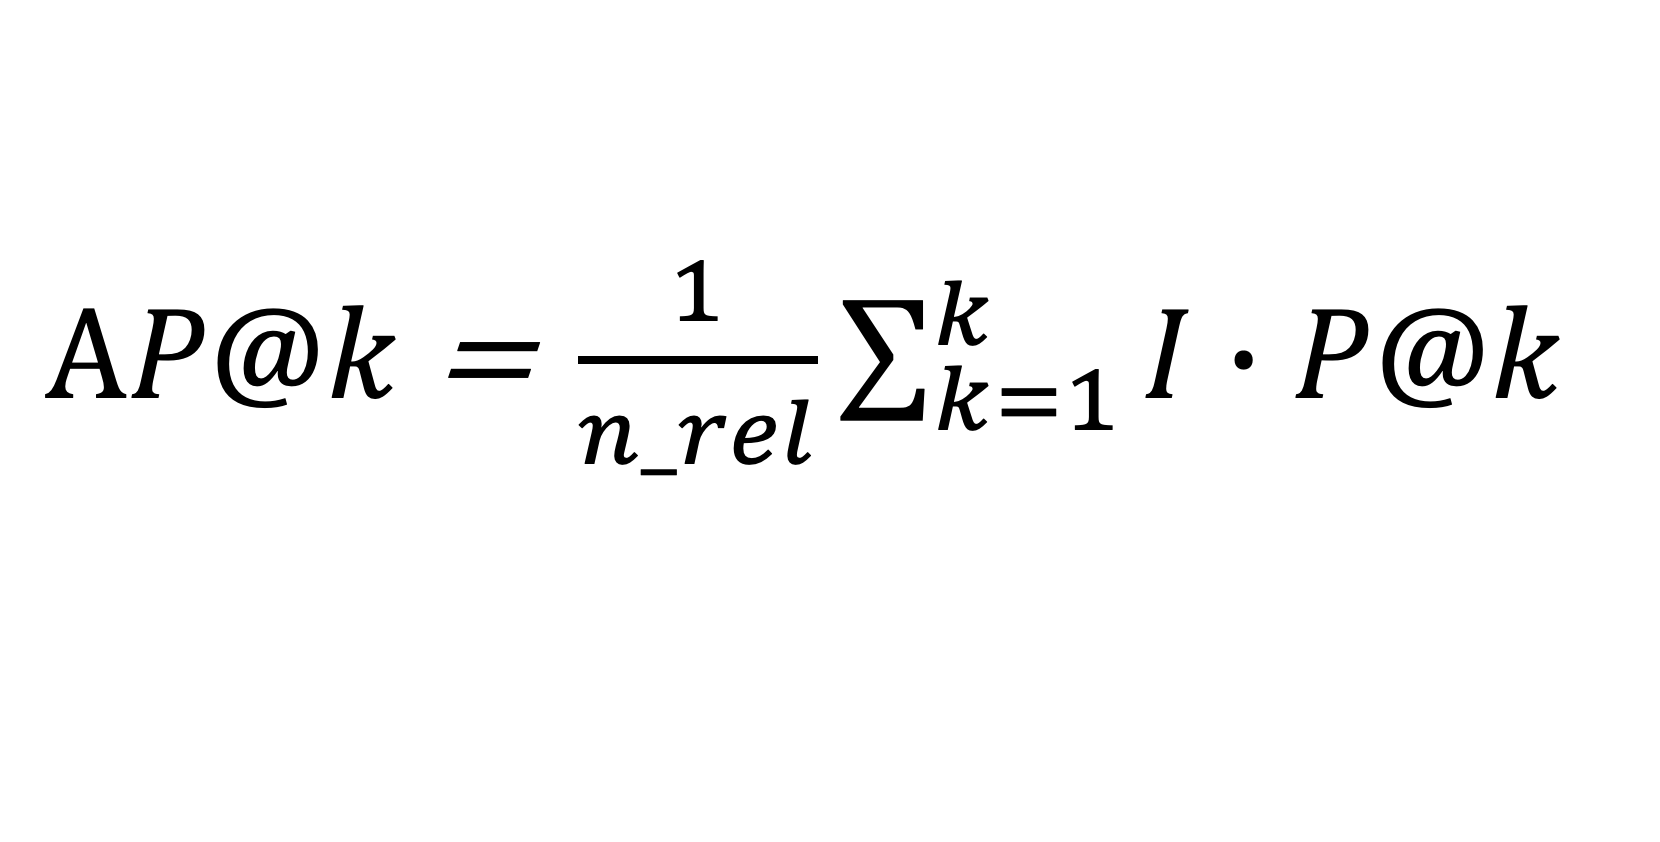

In [ ]:
def averagePrecisionAtK(actual: tp.List[int], predicted: tp.List[float], k: int) -> float:
    """
    1) в цикле от i=1 до k посчитать precicionAtK для каждого i-го элемента
    2) если i-ый элемент релевантен, то учитывать его в суммировании конечного скороа, иначе - нет
    3) сумму скоров precicionAtK разделить на число релевантных объектов у юзера
    """
    pass

In [ ]:
ApkTestCase = namedtuple('Avgprecision_at_k', ['actual', 'predicted', 'k', 'ans'])

avg_precision_at_k_test_cases = [
                                 ApkTestCase([0,1,1], [0.88, 0.67, 0.66], 3, 0.58),
                                 ApkTestCase([0,0,0], [0.88, 0.67, 0.66], 3, 0.0),
                                 ApkTestCase([1,0,0], [0.88, 0.67, 0.66], 3, 1.0),
                                 ApkTestCase([1,0,0], [0.88, 0.67, 0.66], 1, 1.0),
                                 ApkTestCase([1,0,1], [0.3, 0.7, 0.6], 3, 0.58)
                                ]

In [ ]:
for case in avg_precision_at_k_test_cases:
    result = averagePrecisionAtK(case.actual, case.predicted, case.k)
    assert math.isclose(case.ans, result, rel_tol=0.01), f"{result}!= {case.ans}"

### Mean Average Precision@K

Предыдущие расчеты делались для отдельно взятого пользователя. Обычно требуется рассчитать качество на выборке из N пользователей. Усредняем Average Precision@K для каждого пользователя.

In [ ]:
def meanAveragePrecisionAtK(actual: tp.List[tp.List[int]], predicted: tp.List[tp.List[float]], k: int) -> float:
    return np.mean([averagePrecisionAtK(a, p, k) for a, p in zip(actual, predicted)])

### Discounted Cumulative Gain

Классическая метрика ранжирования, которая использует логарифимирование для того чтобы сильнее учитывать изменения качества в топе выдачи. Можно рассчитывать как совокупно во всему списку рекомендаций для пользователя, так и брать top k рекомендаций.

In [ ]:
def discountedCumulativeGainAtK(actual: tp.List[int], predicted: tp.List[float], k: int) -> float:
    """
    1) отсортировать actual и predicted по убыванию predicted
    2) посчитать discounts
    3) в качестве gains взять actual без изменений
    3) разделить поэлементно gains/discounts и просуммировать
    """
    pass

actual = [2, 2,1, 0]
predicted = [2,1,2,0]
discountedCumulativeGainAtK(actual, predicted, 2)

In [ ]:
DCGTestCase = namedtuple('DCG_at_k', ['actual', 'predicted', 'k', 'ans'])

dcg_test_cases = [
                DCGTestCase([3,2,1,0], [2,3,1,0], 3, 4.39),
                DCGTestCase([3,2,1,0], [3,2,1,0], 3, 4.76),
                DCGTestCase([3,2,1,0], [0,1,2,3], 3, 1.63),
                DCGTestCase([3,2,1,0], [0,1,2,3], 2, 0.63),
]

for case in dcg_test_cases:
    result = discountedCumulativeGainAtK(case.actual, case.predicted, case.k)
    assert math.isclose(case.ans, result, rel_tol=0.01), f"{result}!= {case.ans}"

### follow up - реализовать dcg с нелинейностью  (parametrizedDCG)
принимает на вход парамер gain_type, который принимает значение linear или exponential и в зависимости от этого значения релевантностей подаются либо как есть, либо считаются по формуле (2 ** rel)-1

In [ ]:
def parametrizedDCG(actual: tp.List[int], predicted: tp.List[float], k: int=1, gain_type: str='linear') -> float:
    """
    1) аналогично предыдущей функйции, только нужно добавить параметр gain_type и написать логику для него
    2) gain_type = 'non_linear' для каждого айтема считает gain как (2 ** rel)-1
    """
    pass

In [ ]:
ParamDCGTestCase = namedtuple('ParamDCG_at_k', ['actual', 'predicted', 'k', 'gain_type' ,'ans'])

param_dcg_test_cases = [
                ParamDCGTestCase([3,2,1,0], [2,3,1,0], 3,'linear', 4.39),
                ParamDCGTestCase([3,2,1,0], [2,3,1,0], 3,'nonlinear', 7.91),
]

for case in param_dcg_test_cases:
    result = parametrizedDCG(case.actual, case.predicted, case.k, case.gain_type)
    assert math.isclose(case.ans, result, rel_tol=0.01), f"{result}!= {case.ans}"

### Normalized Discounted Cumulative Gain

Нормализуем на DCG идеального ранжирования

In [ ]:
def normalizedDiscountedCumulativeGainAtK(actual: tp.List[int], predicted: tp.List[float], k: int) -> float:
    """
    1) используем функцию discountedCumulativeGainAtK
    2) нормализуем результат на discountedCumulativeGainAtK идеального ранжирования
    """
    pass

In [ ]:
actual = [3,2,1,0]
predicted = [2,3,1,0]
k = 3
result = normalizedDiscountedCumulativeGainAtK(actual, predicted, k)
assert math.isclose(0.86, result, rel_tol=0.01), f"{result}!= {ans}"

### Recriprocal Rank

Число, обратное к позиции первой релевантной рекомендации. 

In [ ]:
def ReciprocalRank(actual: tp.List[int], predicted: tp.List[float]) -> float:
    """
    1) отсортировать actual и predicted по убыванию predicted
    2) найти позицию первого релевантного айтема
    3) вернуть число, обратное этой позиции (подумать могут ли возникнуть проблемы из-за нулевой индексации)
    """
    pass

In [ ]:
ReciprocalRankCase = namedtuple('ReciprocalRank', ['actual', 'predicted', 'ans'])

reciprocal_rank_test_cases = [
                ReciprocalRankCase([0,1,0], [0.75, 0.73, 0.72], 0.5),
                ReciprocalRankCase([0,0,0], [0.75, 0.73, 0.72], 0.0),
                ReciprocalRankCase([1,1,1], [0.75, 0.73, 0.72], 1.0),
                ReciprocalRankCase([1,1,1], [0.73, 0.75, 0.72], 1.0),
                ReciprocalRankCase([1,0,0], [0.73, 0.75, 0.72], 0.5),
]

for case in reciprocal_rank_test_cases:
    result = ReciprocalRank(case.actual, case.predicted)
    assert math.isclose(case.ans, result, rel_tol=0.01), f"{result}!= {case.ans}"

### Материалы

Хорошая библиотека с качественной реализацией ряда метрик.

https://github.com/statisticianinstilettos/recmetrics